In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Exploratory Data Analysis/SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Exploratory Data Analysis

<ipython-input-13-430cf62fbb63>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Sales"],color='red',label='Sales',shade=True)
<ipython-input-13-430cf62fbb63>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Profit"],color='blue',label='Profit',shade=True)


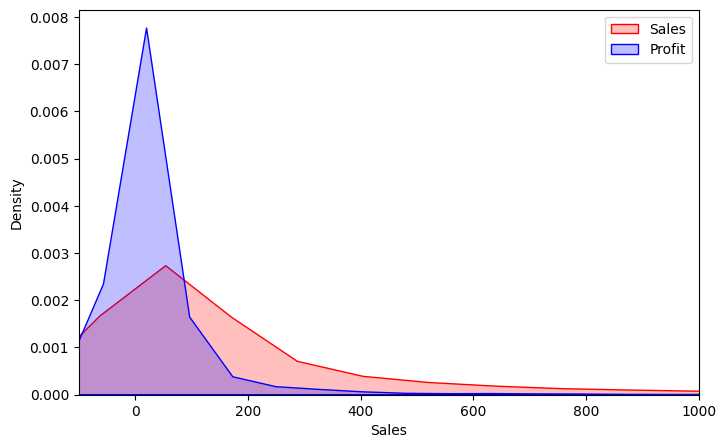

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Sales"],color='red',label='Sales',shade=True)
sns.kdeplot(df["Profit"],color='blue',label='Profit',shade=True)
plt.xlim([-100,1000])
plt.legend()

The above graph shows that the profit is higher than sales.

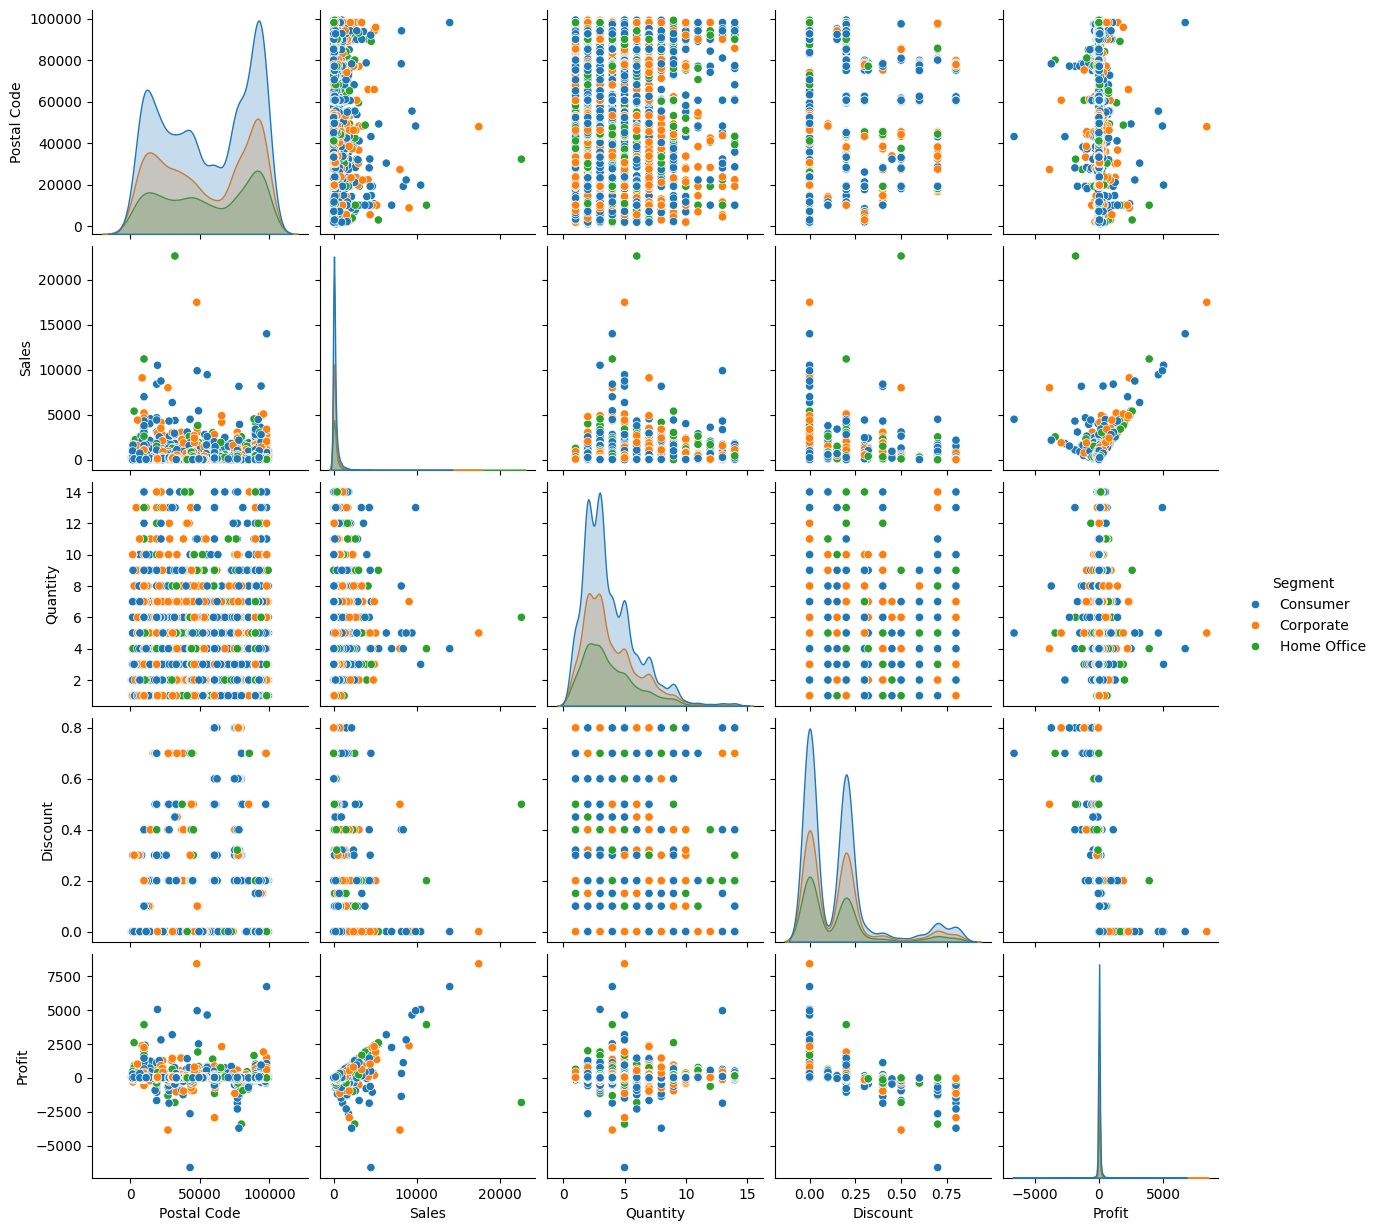

In [15]:
sns.pairplot(df,hue="Segment")

In [22]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation


<Axes: >

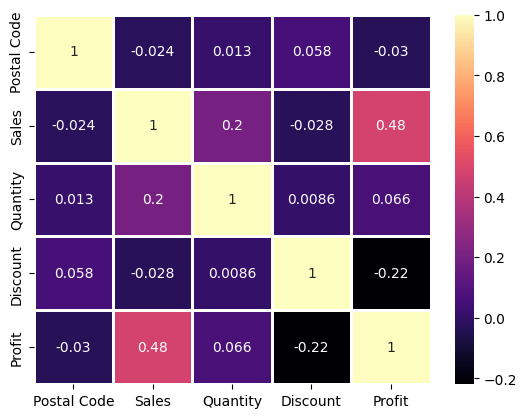

In [24]:
sns.heatmap(correlation_matrix,annot=True,cmap="magma",linewidths=1,linecolor="white")

From the above heatmap you can say that the profit and sales has positive correlation with each other , if the sales increases profit increases and vice versa.

The discount and profit are negatively correlated.

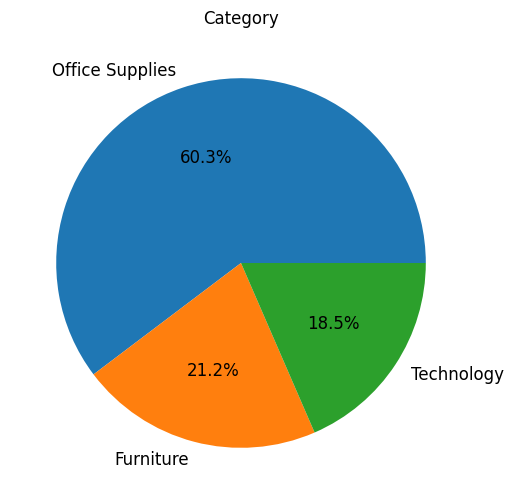

In [28]:
plt.figure(figsize=(6,6))
textprops={"fontsize":12}
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops=textprops)
plt.show()

Office Supplies have a greater demand than other categories

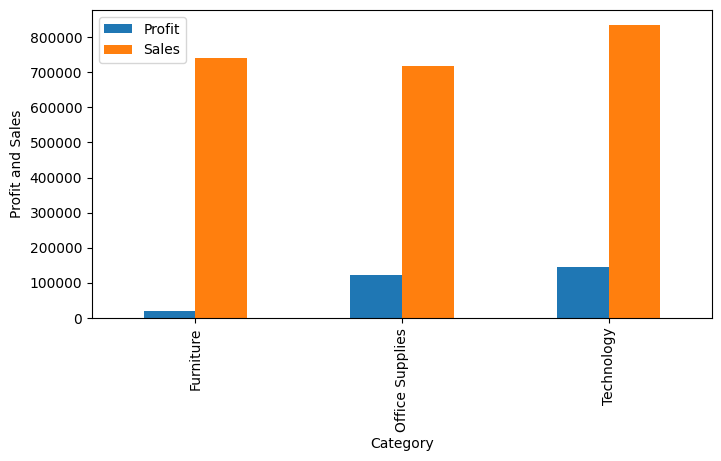

In [30]:
df.groupby('Category')[['Profit','Sales']].agg(sum).plot(kind='bar',figsize=(8,4))
plt.ylabel('Profit and Sales')
plt.show()

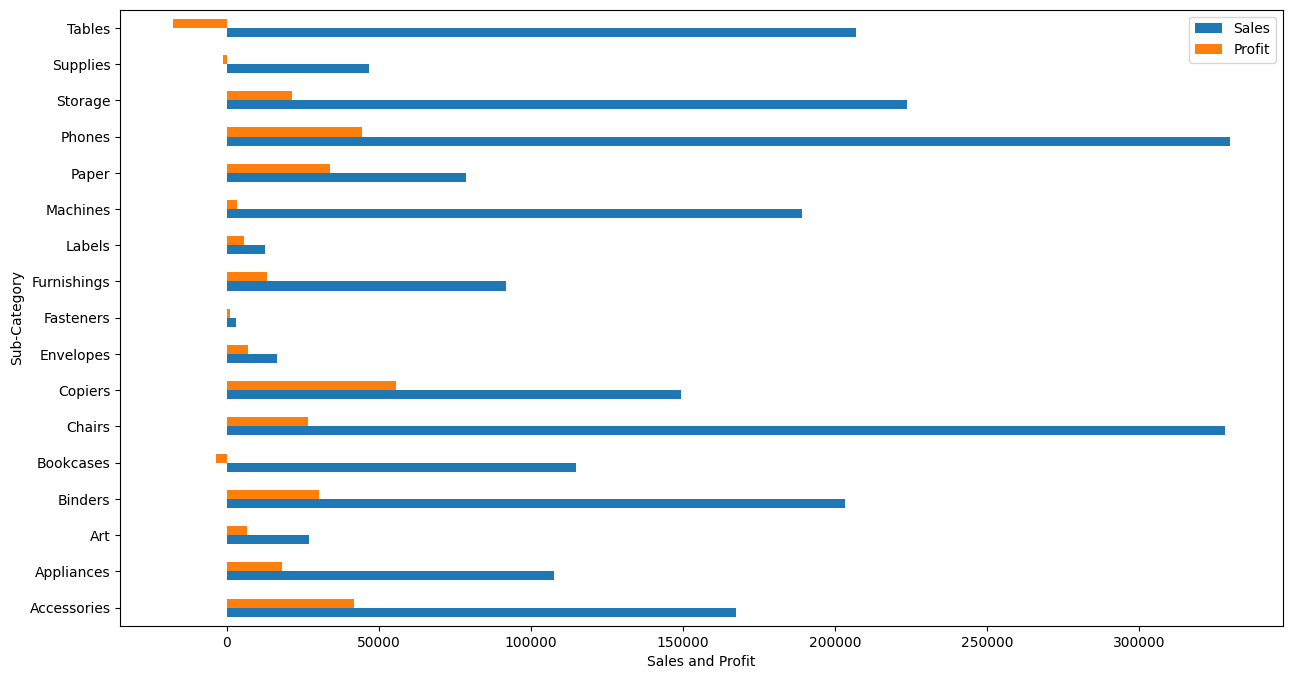

In [32]:
df.groupby('Sub-Category')[['Sales','Profit']].agg(sum).plot(kind='barh',figsize=(15,8))
plt.ylabel('Sub-Category')
plt.xlabel('Sales and Profit')
plt.show()

We have 3 weak areas tables, supplies and Bookcases as we are facing loss on the sales of these items.
On the sales of tables we are facing highest loss.

Text(0.5, 1.0, 'Count of Ship mode by region and ship mode')

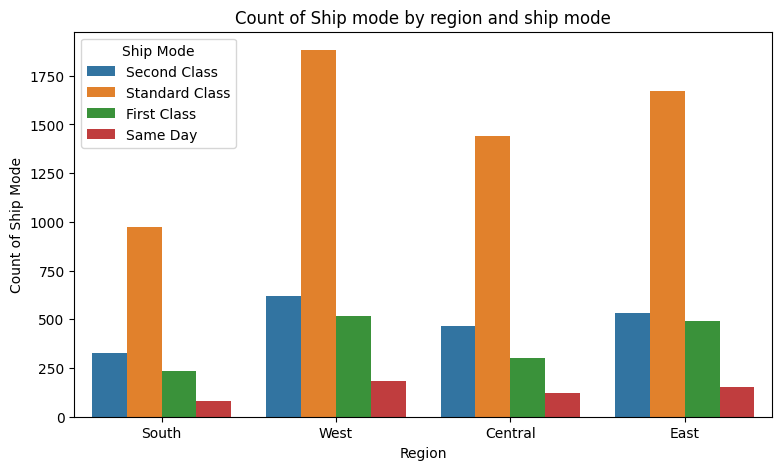

In [36]:
plt.figure(figsize=(9,5))
sns.countplot(x='Region',hue='Ship Mode',data=df)
plt.ylabel('Count of Ship Mode')
plt.title('Count of Ship mode by region and ship mode')

Least sales are in Southern region , we can attract this region by offering more discount . Standard mode of shipment is opted by most of the customers in each region.

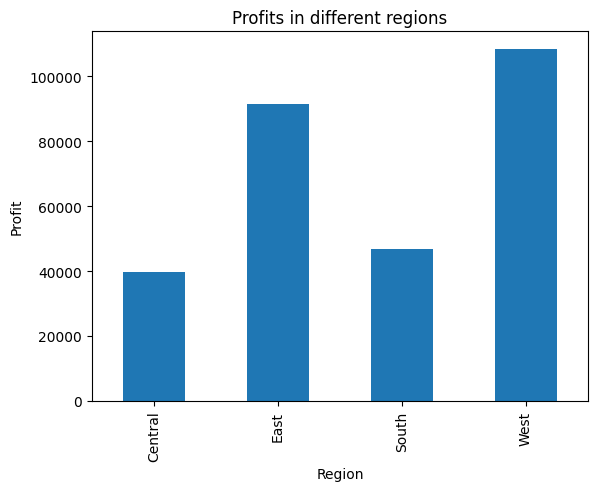

In [37]:
df.groupby('Region')['Profit'].agg(sum).plot(kind='bar')
plt.ylabel('Profit')
plt.title('Profits in different regions')
plt.show()

Central and Southern region are generating less profit as compared to the Eastern and western Region. Increase the sales in Central and Southern region in order to generate more profit in these region

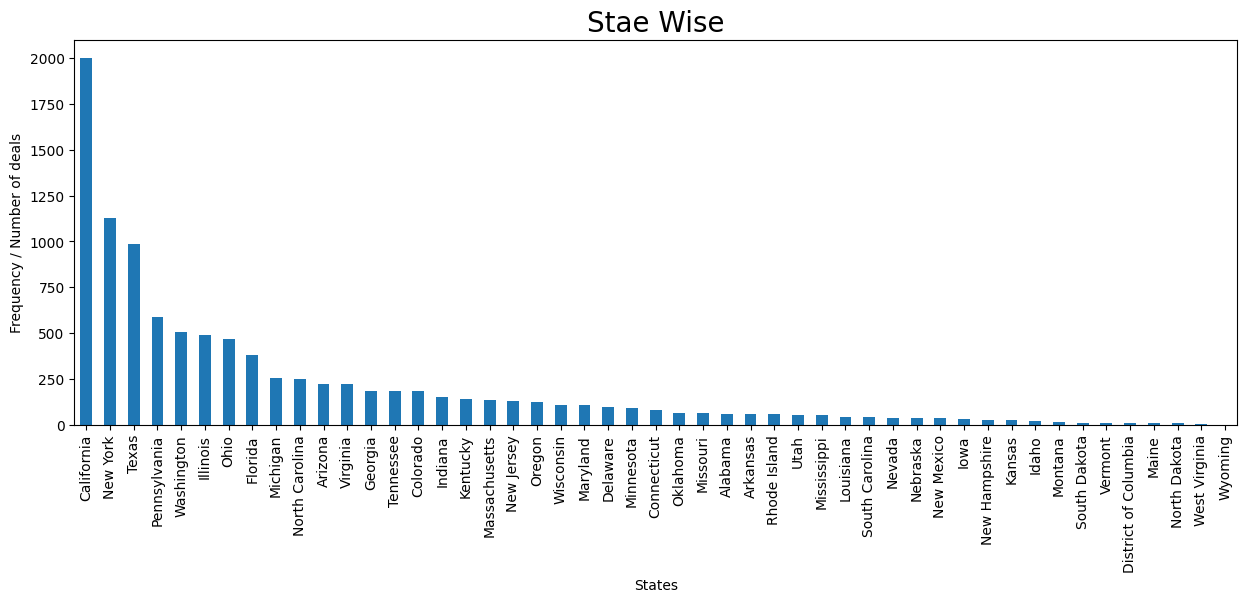

In [40]:
df["State"].value_counts().plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.title('Stae Wise', fontsize=20)
plt.show()

State wise California has the highest sales. Few states like Nort America , Wyoming and West Virginia have less or no sales at all. To generate more profit we have to increase ouer sales in Texas and New York whre we have potential customers.